# **Will the Customer Accept the Coupon?**
        
**Table of Contents**  
1. [Introduction](#introduction)  
2. [Data Exploration](#data-exploration)  
3. [Data Clean Up](#data-clean-up)  
4. [Visual Analysis](#visual-analysis)   
        

## **Introduction**  <a id='introduction'></a>

Imagine driving through town and receiving a digital coupon for a nearby restaurant. Would you accept it and detour, save it for later, or ignore it?  
This project analyzes factors influencing a driver’s decision to accept or reject different types of coupons.

### **Objective**  
- Use visualizations to explore differences between customers who accept vs. reject coupons.  
- Identify key demographic and contextual factors affecting coupon redemption.

### **Data Source**  
- **Dataset:** UCI Machine Learning Repository (Survey from Amazon Mechanical Turk)  
- **Response Variable:** `Y` (1 = Accepted, 0 = Rejected)  
- **Coupon Types:** Bar, Coffeehouse, Takeaway, Low-Priced Restaurant, High-Priced Restaurant  
        

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv("data/coupons.csv")  # Ensure correct file path

# Display dataset overview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## **Data Exploration**  <a id='data-exploration'></a>

### **Dataset Summary**  
- Checking for missing values.   
        

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


## **Data Clean Up**  <a id='data-clean-up'></a>

In [4]:
# Remove car column since most of them are null and won't be useful for data analysis
df = df.drop("car", axis=1)

# Replace missing values in categorical columns with "Unknown" so we can keep as much data as possible
fill_cols = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
df[fill_cols] = df[fill_cols].fillna("Unknown")

# Verify there are no more missing values
print(df.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


## **Visual Analysis**  <a id='visual-analysis'></a>

### **1. Proportion of Coupon Acceptance**


<Axes: title={'center': 'Coupon Acceptance Proportion'}, ylabel='count'>

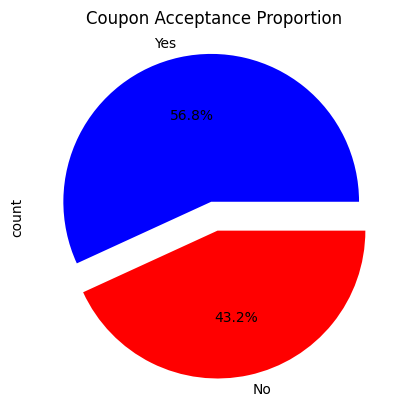

In [5]:
# What proportion of the total observations chose to accept the coupon?
# Using panda's built in plot method 
df.Y.value_counts().plot(kind='pie', 
                           explode = [0.1,0.1], 
                           autopct = '%1.1f%%', 
                           colors = ['b', 'r'], 
                           title = 'Coupon Acceptance Proportion', 
                           labels=["Yes", "No"])

### **2. Acceptance Rate by Coupon Type**  


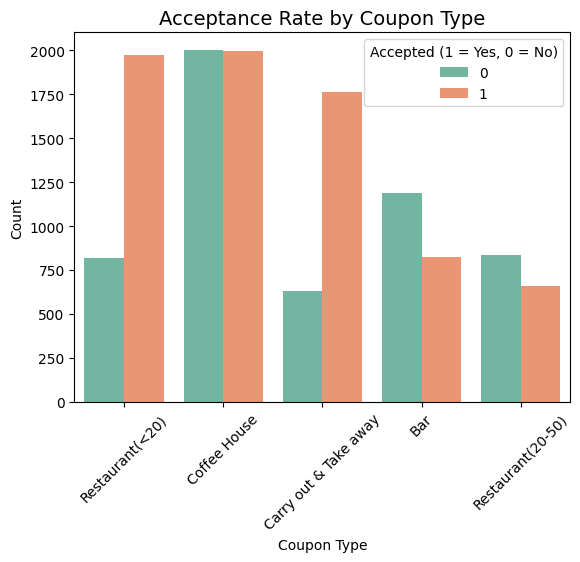

In [6]:
# Use a bar plot to visualize the `coupon` column.
sns.countplot(data=df, x="coupon", hue="Y", palette="Set2")
plt.title("Acceptance Rate by Coupon Type", fontsize=14)
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted (1 = Yes, 0 = No)")
plt.show()


### **3. Investigating the Bar Coupons**  


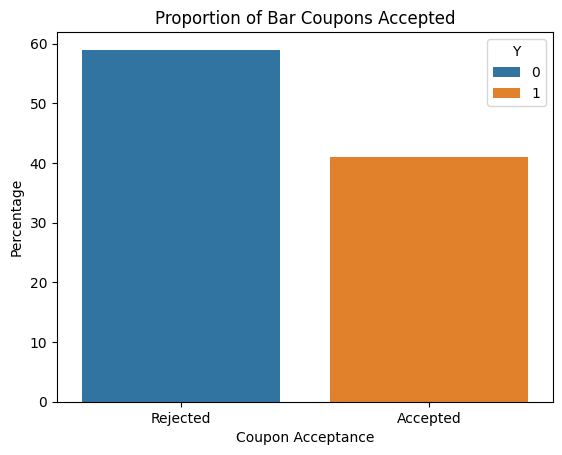

In [7]:
# Create a new `DataFrame` that contains just the bar coupons
bar_coupons = df.query("coupon == 'Bar'")
# Calculate the bar coupon acceptance
bar_coupon_acceptance = bar_coupons['Y'].value_counts(normalize=True) * 100
# Plot the bar cupon acceptance using seaborn library
ax = sns.barplot(x=bar_coupon_acceptance.index, y=bar_coupon_acceptance.values, hue=bar_coupon_acceptance.index)
# Customize labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Rejected", "Accepted"])
plt.xlabel("Coupon Acceptance")
plt.ylabel("Percentage")
plt.title("Proportion of Bar Coupons Accepted")

plt.show()


#### Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more

In [8]:
# Display unique values of column "Bar"
df["Bar"].unique()
# Set low and high visitors variables 
low_visitors = ["never", "less1", "1~3"]
high_visitors = ["4~8", "gt8"]

# create a new column to classify users into 2 groups
df["bar_frequency_group"] = df["Bar"].apply(lambda x: "3 or fewer" if x in low_visitors else "More than 3" if x in high_visitors else "Unknown")

# Calculate acceptance rate for each group
acceptance_rates = df[df["bar_frequency_group"] != "Unknown"].groupby("bar_frequency_group")["Y"].mean() * 100

# plot acceptance rates using plotly library
px.pie(data_frame=acceptance_rates, values=acceptance_rates, names=acceptance_rates.index, title="Coupon Acceptance Rate by Bar Visit Frequency")


#### Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Acceptance rate (More than once a month & over 25): 62.15%
Acceptance rate (All others): 0.55%


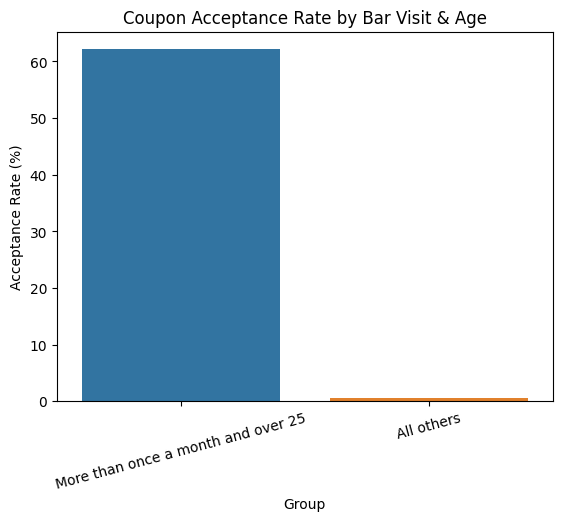

In [9]:
# set frequency variables
more_than_once_values = ['1~3', 'gt8', '4~8']
less_than_once_values = ["never", "less1"]

# convert age column to integer
df["age_numeric"] = df["age"].str.extract(r"(\d+)").astype(int)

# Filter for bar-goers who visit more than once a month AND are older than 25
bar_more_than_once_over_25 = df.query("Bar in @more_than_once_values and age_numeric > 25")

# Define the two groups
group1 = bar_more_than_once_over_25["Y"].mean() * 100
# the ~ reverse the result
group2 = df[~df.index.isin(bar_more_than_once_over_25.index)]["Y"].mean()

# Print the results
print(f"Acceptance rate (More than once a month & over 25): {group1:.2f}%")
print(f"Acceptance rate (All others): {group2:.2f}%")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    "Group": ["More than once a month and over 25", "All others"],
    "Acceptance Rate (%)": [group1, group2]
})

# Create plot using seaborn library
sns.barplot(comparison_df, x="Group", y="Acceptance Rate (%)", hue="Group")
plt.title("Coupon Acceptance Rate by Bar Visit & Age")
plt.xticks(rotation=15)
plt.show()


#### Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

Acceptance rate (More than once a month & passanger not a kid & occupation is not Farming Fishing & Forestry): 62.31%
Acceptance rate (All others): 54.60%


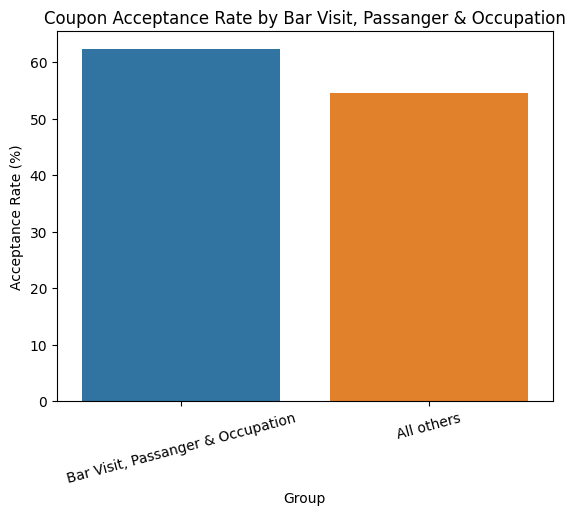

In [10]:
# set frequency filter variable
more_than_once_values = ['1~3', 'gt8', '4~8']

# explore unique values for passenger
df["passanger"].unique()

# explore unique values for occupations
df["occupation"].unique()

# filter data based on passenger and occupation
passenger_and_occupation_filtered_data = df.query("Bar in @more_than_once_values and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")

# define the 2 groups
group1 = passenger_and_occupation_filtered_data["Y"].mean() * 100
group2 = df[~df.index.isin(passenger_and_occupation_filtered_data.index)]["Y"].mean() * 100

# Print the results
print(f"Acceptance rate (More than once a month & passanger not a kid & occupation is not Farming Fishing & Forestry): {group1:.2f}%")
print(f"Acceptance rate (All others): {group2:.2f}%")

# Create compatison dataframe
comparison_df = pd.DataFrame({
    "Group": ["Bar Visit, Passanger & Occupation", "All others"],
    "Acceptance Rate (%)": [group1, group2]
})

# Create a bar plot using seabor
sns.barplot(comparison_df, x="Group", y="Acceptance Rate (%)", hue="Group")
plt.title("Coupon Acceptance Rate by Bar Visit, Passanger & Occupation")
plt.xticks(rotation=15)
plt.show()


#### Compare the acceptance rates between drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

Acceptance rate (More than once a month, had passengers that were not a kid, and were not widowed): 62.31%
Acceptance rate (All others): 54.60%


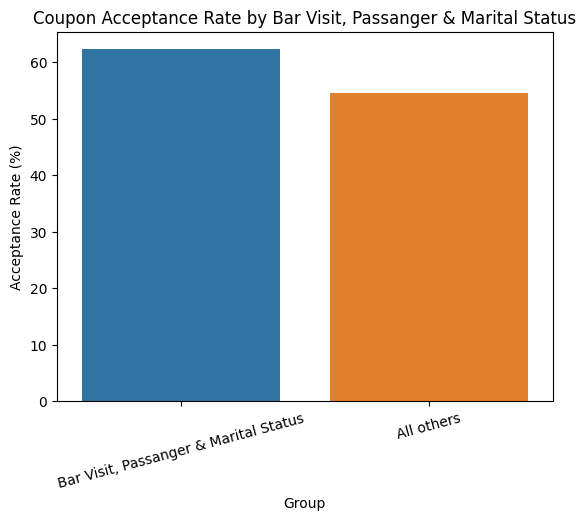

In [11]:
# Explore unique values for maritalStatus column
df.maritalStatus.unique()

# Set frequency filter
more_than_once_values = ['1~3', 'gt8', '4~8']

# filter dataframe
filtered_df = df.query("Bar in @more_than_once_values and passanger != 'Kid(s)' and maritalStatus != 'Widowed'")

# define the 2 groups
group1 = filtered_df["Y"].mean() * 100
group2 = df[~df.index.isin(filtered_df.index)]["Y"].mean() * 100

# Print the results
print(f"Acceptance rate (More than once a month, had passengers that were not a kid, and were not widowed): {group1:.2f}%")
print(f"Acceptance rate (All others): {group2:.2f}%")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    "Group": ["Bar Visit, Passanger & Marital Status", "All others"],
    "Acceptance Rate (%)": [group1, group2]
})

# Create a bar plot using seaborn library
sns.barplot(comparison_df, x="Group", y="Acceptance Rate (%)", hue="Group")
plt.title("Coupon Acceptance Rate by Bar Visit, Passanger & Marital Status")
plt.xticks(rotation=15)
plt.show()


### Investigate Passenger Type for Each Coupon

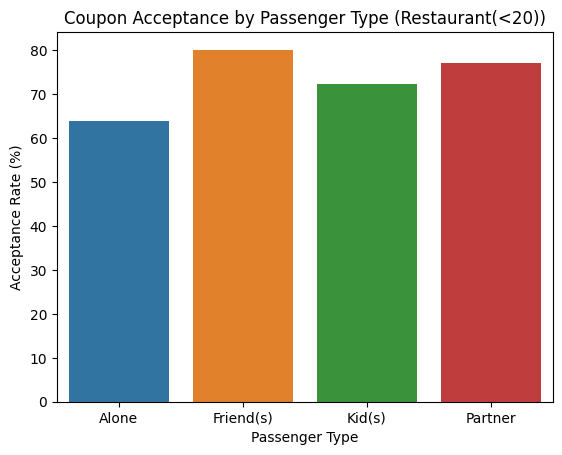

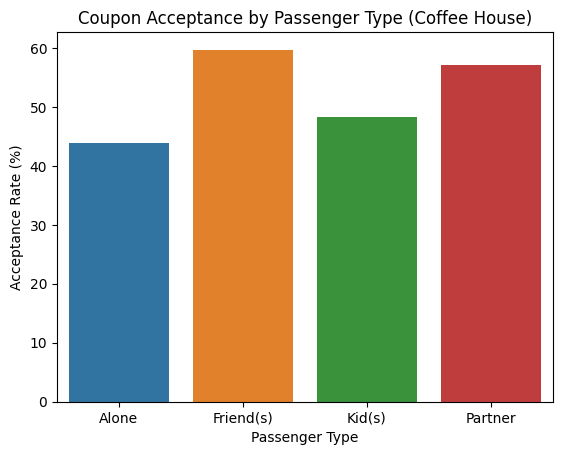

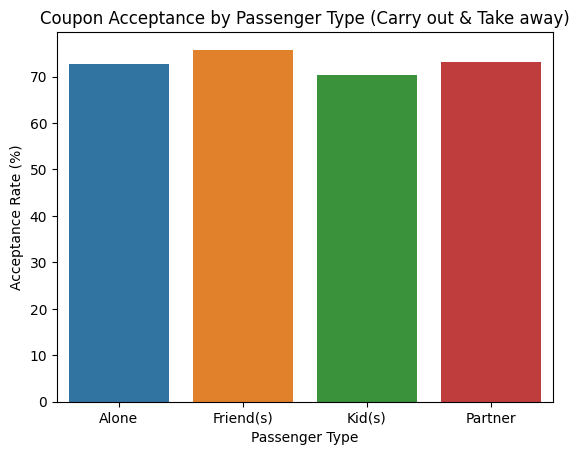

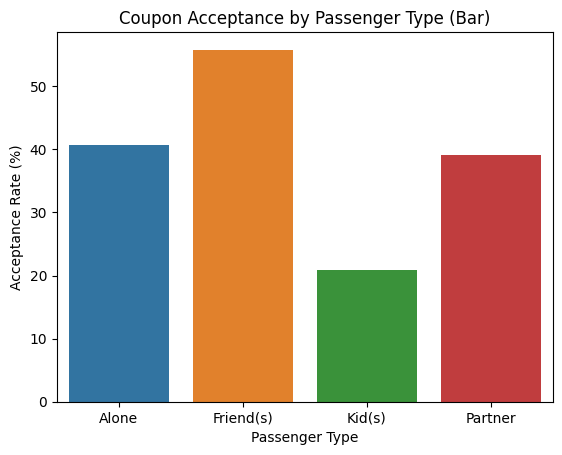

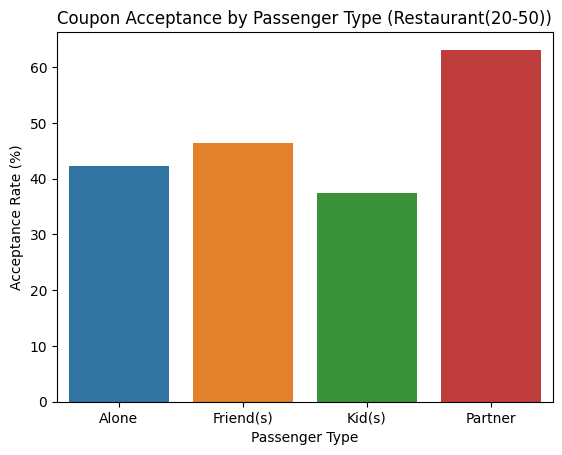

In [12]:
# create passenger acceptance rates dictionary 
passenger_acceptance_rates = {}

# loop through coupon unique values in order to create passenger_acceptance_rates mapping
for coupon_type in df["coupon"].unique():
    # query current coupon type
    coupon_data = df.query("coupon == @coupon_type")
    # group by passenger type to calculate mean for current coupon type
    grouped = coupon_data.groupby("passanger")["Y"].mean() * 100
    # add mapping to passenger_acceptance_rates dictionary
    passenger_acceptance_rates[coupon_type] = grouped

# loop through passenger_acceptance_rates properties
for coupon, rates in passenger_acceptance_rates.items():
    # Generate bar plot using seaborn
    sns.barplot(x=rates.index, y=rates.values, hue=rates.index)
    # Create custom labes and title
    plt.xlabel("Passenger Type")
    plt.ylabel("Acceptance Rate (%)")
    plt.title(f"Coupon Acceptance by Passenger Type ({coupon})")
    plt.show()


### Investigate the Impact of Time of Day

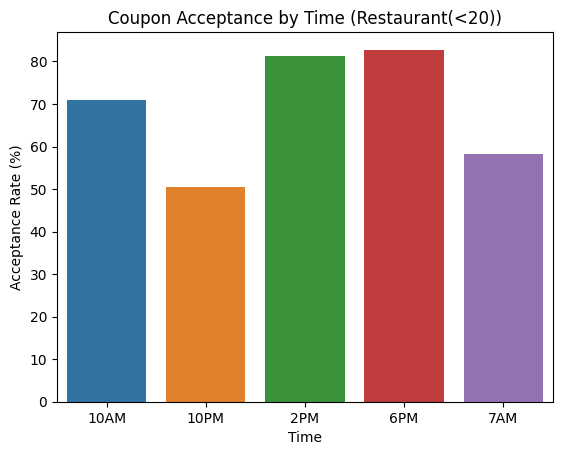

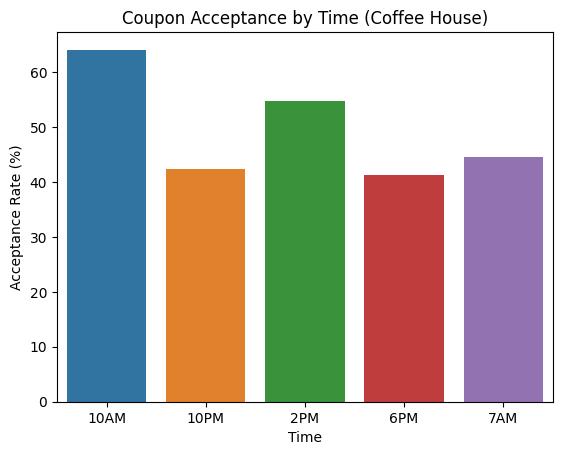

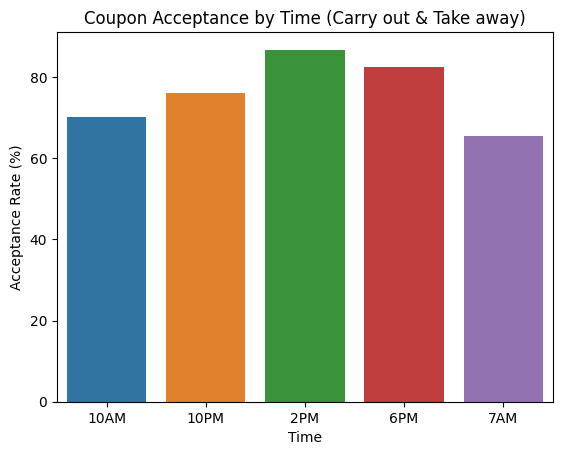

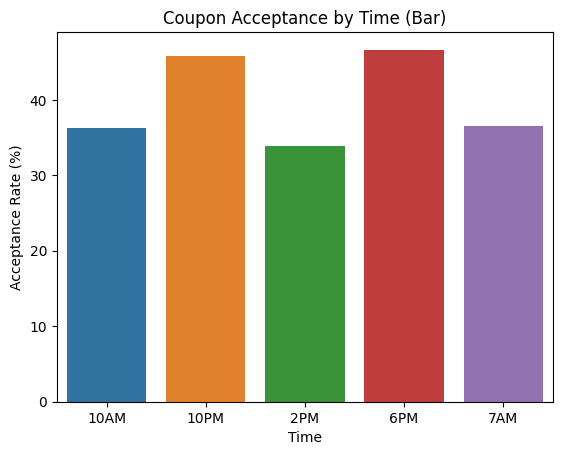

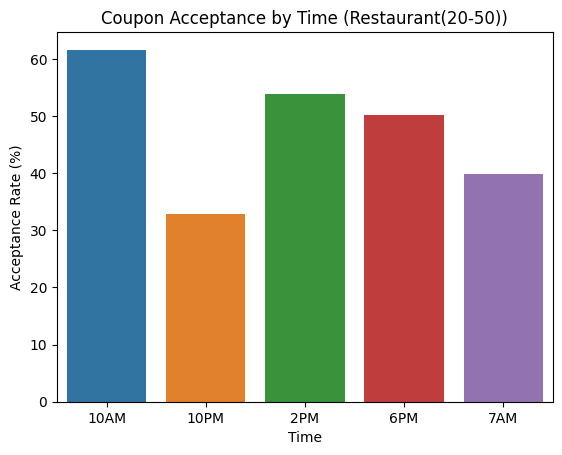

In [13]:
# create time acceptance rates dictionary 
time_acceptance_rates = {}

# loop through coupon unique values in order to create time_acceptance_rates mapping
for coupon_type in df["coupon"].unique():
    # query current coupon type
    coupon_data = df.query("coupon == @coupon_type")
    # group by time type to calculate mean for current coupon type
    grouped = coupon_data.groupby("time")["Y"].mean() * 100
    # add mapping to time_acceptance_rates dictionary
    time_acceptance_rates[coupon_type] = grouped

# loop through time_acceptance_rates properties
for coupon, rates in time_acceptance_rates.items():
    # Generate bar plot using seaborn
    sns.barplot(x=rates.index, y=rates.values, hue=rates.index)
    # Create custom labes and title
    plt.xlabel("Time")
    plt.ylabel("Acceptance Rate (%)")
    plt.title(f"Coupon Acceptance by Time ({coupon})")
    plt.show()


### Investigate the Impact of Weather

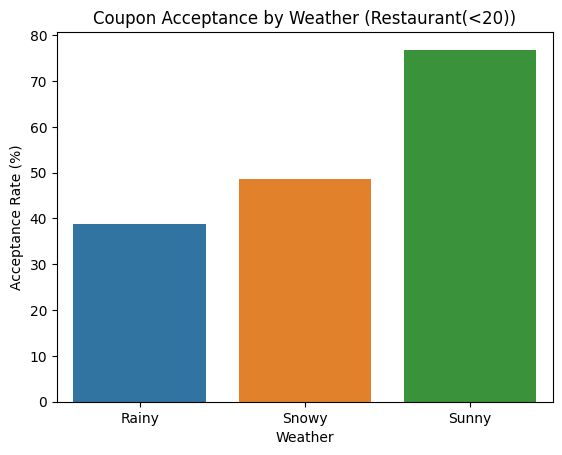

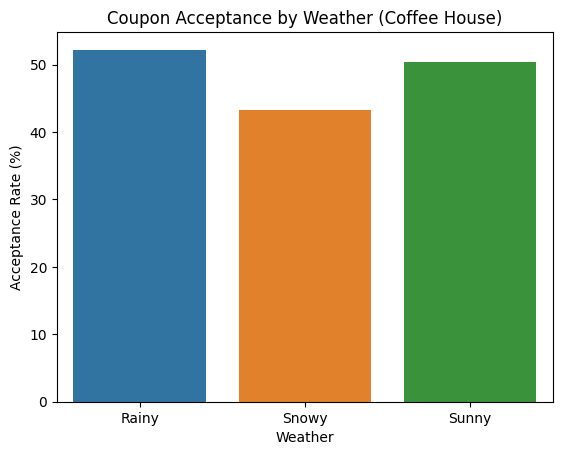

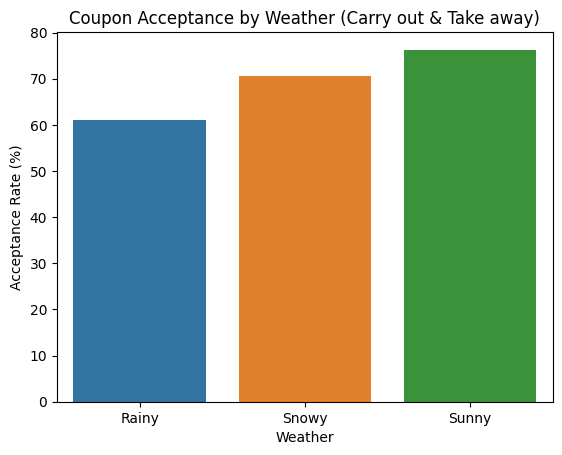

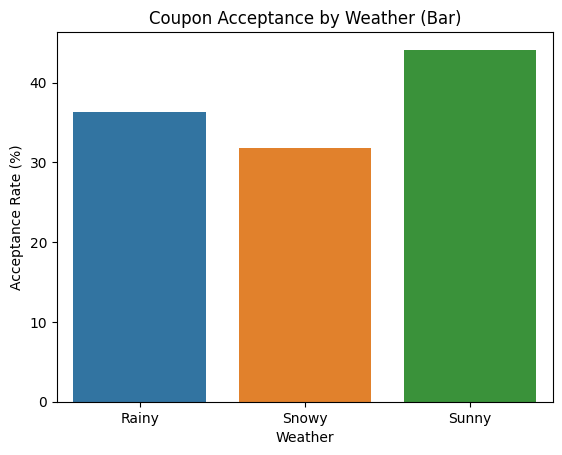

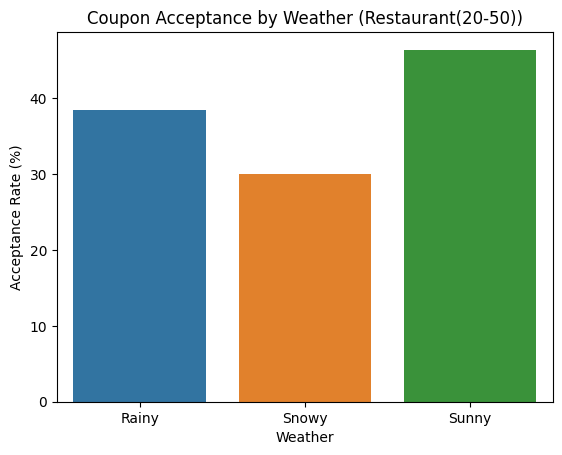

In [14]:
# create weather acceptance rates dictionary 
weather_acceptance_rates = {}

# loop through coupon unique values in order to create weather_acceptance_rates mapping
for coupon_type in df["coupon"].unique():
    # query current coupon type
    coupon_data = df.query("coupon == @coupon_type")
    # group by weather type to calculate mean for current coupon type
    grouped = coupon_data.groupby("weather")["Y"].mean() * 100
    # add mapping to weather_acceptance_rates dictionary
    weather_acceptance_rates[coupon_type] = grouped

# loop through weather_acceptance_rates properties
for coupon, rates in weather_acceptance_rates.items():
    # Generate bar plot using seaborn
    sns.barplot(x=rates.index, y=rates.values, hue=rates.index)
    # Create custom labes and title
    plt.xlabel("Weather")
    plt.ylabel("Acceptance Rate (%)")
    plt.title(f"Coupon Acceptance by Weather ({coupon})")
    plt.show()
